## Exploring the Titanic dataset

### Be sure to run the following cell before starting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### 1. Import the file "train.csv" from the working directory and store in a pandas data frame called "df". Make "PassengerId" the index. Print the first few lines of the data frame.

In [2]:
df = pd.read_csv("Data/train.csv")
df.set_index("PassengerId")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Plot a histogram of passenger ages

<AxesSubplot:xlabel='Age', ylabel='Count'>

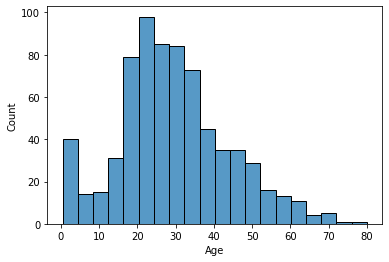

In [3]:
import seaborn as sns

sns.histplot(data=df, x='Age')

### 3. The following plot shows a density plot of passenger ages. Produce a similar plot in which the values for male and female passengers are plotted separately on the same plot.

<AxesSubplot:ylabel='Density'>

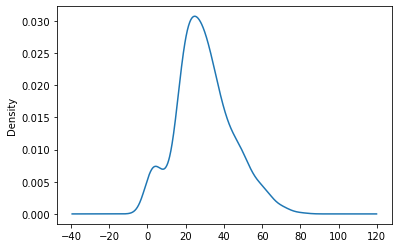

In [4]:
df.Age.plot(kind='density')

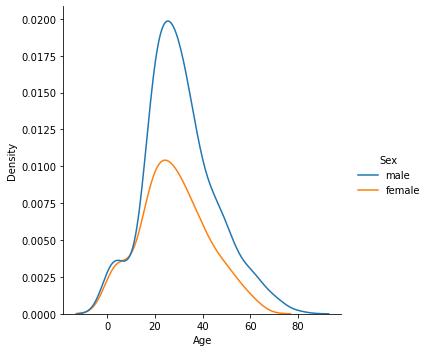

In [5]:
sns.displot(data=df, x="Age", hue="Sex", kind="kde")

### 4. What was the average age of male passengers? Female passengers?

In [6]:
females = df[df["Sex"] == "female"]
female_mean_age = females["Age"].mean()
female_mean_age

27.915708812260537

In [7]:
males = df[df["Sex"] == "male"]
male_mean_age = males["Age"].mean()
male_mean_age

30.72664459161148

An alternative approach that can get you both results in one line of code. `groupby()` is a good function to know, if you aren't already familiar with it.

In [9]:
df.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

### 5. What percentage of passengers survived?

In [10]:
total_num_passengers = len(df.index)

passengers_survived = df[df["Survived"] == 1]
num_passengers_survived = len(passengers_survived.index)

percentage_survived = num_passengers_survived/total_num_passengers * 100
percentage_survived

38.38383838383838

Consider this alternative for percentage of passengers who survived:

In [11]:
df['Survived'].mean()

0.3838383838383838

Do you understand why we can just take the mean to get percentage? Because `Survived` is a logical variable, you can perform a function like mean on it. This is a good trick to know about. 

### 6. What are the percentages of each value for "Embarked"?

In [12]:
#df["Embarked"].unique()
df[["PassengerId", "Embarked"]].groupby(["Embarked"]).size() / len(df) * 100 

Embarked
C    18.855219
Q     8.641975
S    72.278339
dtype: float64

Another option for the above:

In [13]:
df['Embarked'].value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

### 7. What is the first argument for the pandas function "aggregate"?

The pandas function "aggregate" takes as a first argument a function.